# Efficient Algorithms for Lasso Regression

In [5]:
%load_ext autoreload
%autoreload 2

import regression
import regression.data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

In [7]:
from copy import deepcopy

lam = 0.5

w_0 = np.random.normal(size=[60])
sub_optim = regression.SubGradientDescent(learning_rate=0.0001, lam=lam)
ista = regression.ISTA(learning_rate=0.0001, lam=lam)
model_1 = regression.CompressiveLinearModel(w_0)
# model_1 = regression.CompressiveLinearModel(np.zeros([60]))
model_2 = deepcopy(model_1)

In [8]:
(X, y) = regression.data.generate_dataset(60, 100, 10, noise_scale=0.0)

In [9]:
lambda_max = np.max(X.T @ y)

In [10]:
def l2(x_1: np.typing.NDArray[np.float64], x_2: np.typing.NDArray[np.float64]):
    return float(np.linalg.norm(x_2 - x_1))

In [11]:
metrics_1 = regression.fit(model_1, sub_optim, X, y, num_epochs=10000, metrics_dict={"l2": l2})
metrics_2 = regression.fit(model_2, ista, X, y, num_epochs=10000, metrics_dict={"l2": l2})

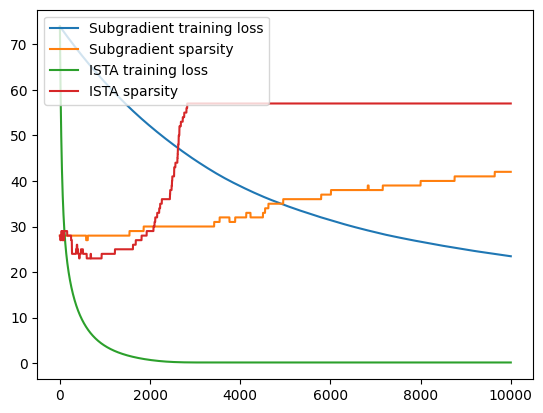

In [12]:
plt.plot(metrics_1["l2"])
plt.plot(metrics_1["sparsity"])
plt.plot(metrics_2["l2"])
plt.plot(metrics_2["sparsity"])
# plt.yscale("log")

# plt.xscale("log")
plt.legend(
    [
        "Subgradient training loss",
        "Subgradient sparsity",
        "ISTA training loss",
        "ISTA sparsity",
    ]
)
plt.show()

## Path

In [13]:
w_0 = np.random.normal(size=[60])
sub_optim = regression.SubGradientDescent(learning_rate=0.0001, lam=lam)
ista = regression.ISTA(learning_rate=0.0001, lam=lam)
model_1 = regression.CompressiveLinearModel(w_0)
# model_1 = regression.CompressiveLinearModel(np.zeros([60]))
model_2 = deepcopy(model_1)

metrics_normal_1 = regression.fit(model_1, sub_optim, X, y, num_epochs=10000, metrics_dict={"l2": l2})
metrics_normal_2 = regression.fit(model_2, ista, X, y, num_epochs=10000, metrics_dict={"l2": l2})

w_0 = np.zeros([60])
sub_optim = regression.SubGradientDescent(learning_rate=0.0001, lam=lam)
ista = regression.ISTA(learning_rate=0.0001, lam=lam)
model_1 = regression.CompressiveLinearModel(w_0)
# model_1 = regression.CompressiveLinearModel(np.zeros([60]))
model_2 = deepcopy(model_1)

metrics_zero_1 = regression.fit(model_1, sub_optim, X, y, num_epochs=10000, metrics_dict={"l2": l2})
metrics_zero_2 = regression.fit(model_2, ista, X, y, num_epochs=10000, metrics_dict={"l2": l2})

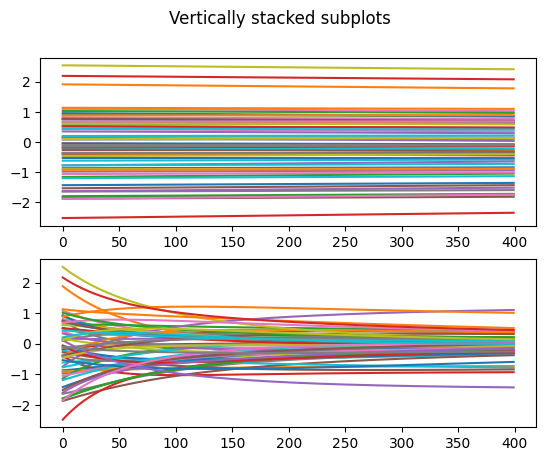

In [14]:
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(metrics_normal_1["path"][0:400])
axs[1].plot(metrics_normal_2["path"][0:400])

plt.show()

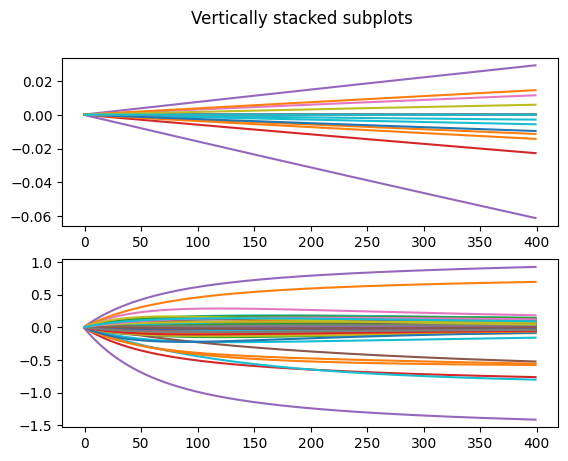

In [15]:
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(metrics_zero_1["path"][0:400])
axs[1].plot(metrics_zero_2["path"][0:400])

plt.show()

## Comparison of different lambda (0 to lambda_max)

In [ ]:
sub_sparsity = []
ista_sparsity = []

axes = np.linspace(0.0, lambda_max, 100)

for lam in tqdm(axes):
    sub_optim = regression.SubGradientDescent(learning_rate=0.0005, lam=lam)
    ista = regression.ISTA(learning_rate=0.0005, lam=lam)
    model_1 = regression.CompressiveLinearModel(np.random.normal(size=[60]))
    model_2 = deepcopy(model_1)
    metrics_1 = regression.fit(model_1, sub_optim, X, y, num_epochs=1000, metrics_dict={"l2": l2})
    metrics_2 = regression.fit(model_2, ista, X, y, num_epochs=1000, metrics_dict={"l2": l2})

    sub_sparsity.append(metrics_1["sparsity"][-1])
    ista_sparsity.append(metrics_2["sparsity"][-1])

  0%|          | 0/100 [00:00<?, ?it/s]

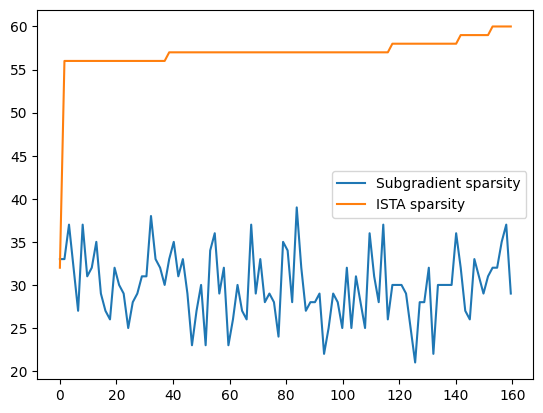

In [ ]:
plt.plot(axes, sub_sparsity)
plt.plot(axes, ista_sparsity)
plt.legend(
    [
        "Subgradient sparsity",
        "ISTA sparsity",
    ]
)
plt.show()

## Sensitivity to initialization

In [ ]:
w_0 = np.zeros([60])
sub_optim = regression.SubGradientDescent(learning_rate=0.001)
ista = regression.ISTA(learning_rate=0.001)
model_1 = regression.CompressiveLinearModel(w_0)
model_2 = deepcopy(model_1)
metrics_zeros_1 = regression.fit(model_1, sub_optim, X, y, num_epochs=1000, metrics_dict={"l2": l2})
metrics_zeros_2 = regression.fit(model_2, ista, X, y, num_epochs=1000, metrics_dict={"l2": l2})

w_0 = np.random.normal(size=[60])
sub_optim = regression.SubGradientDescent(learning_rate=0.001)
ista = regression.ISTA(learning_rate=0.001)
model_1 = regression.CompressiveLinearModel(w_0)
model_2 = deepcopy(model_1)
metrics_normal_1 = regression.fit(model_1, sub_optim, X, y, num_epochs=1000, metrics_dict={"l2": l2})
metrics_normal_2 = regression.fit(model_2, ista, X, y, num_epochs=1000, metrics_dict={"l2": l2})

w_0 = np.linalg.inv(X.T @ X) @ (X.T @ y)
sub_optim = regression.SubGradientDescent(learning_rate=0.001)
ista = regression.ISTA(learning_rate=0.001)
model_1 = regression.CompressiveLinearModel(np.random.normal(size=[60]))
model_2 = deepcopy(model_1)
metrics_least_1 = regression.fit(model_1, sub_optim, X, y, num_epochs=1000, metrics_dict={"l2": l2})
metrics_least_2 = regression.fit(model_2, ista, X, y, num_epochs=1000, metrics_dict={"l2": l2})

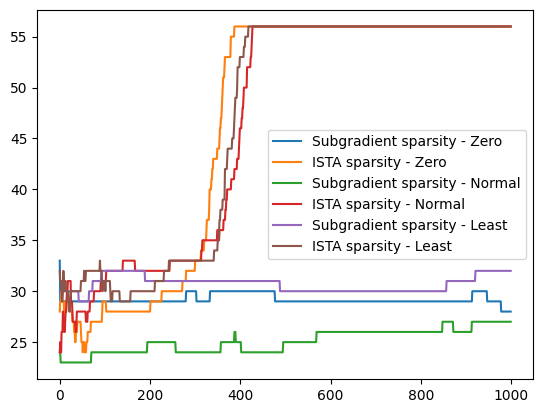

In [ ]:
plt.plot(metrics_zeros_1["sparsity"])
plt.plot(metrics_zeros_2["sparsity"])
plt.plot(metrics_normal_1["sparsity"])
plt.plot(metrics_normal_2["sparsity"])
plt.plot(metrics_least_1["sparsity"])
plt.plot(metrics_least_2["sparsity"])
plt.legend(
    [
        "Subgradient sparsity - Zero",
        "ISTA sparsity - Zero",
        "Subgradient sparsity - Normal",
        "ISTA sparsity - Normal",
        "Subgradient sparsity - Least",
        "ISTA sparsity - Least",
    ]
)
plt.show()

## Convergence with learning rate

In [ ]:
sub_error = []
ista_error = []

axes = np.linspace(0.0001, 0.005, 100)

for learning_rate in tqdm(axes):
    sub_optim = regression.SubGradientDescent(learning_rate=learning_rate)
    ista = regression.ISTA(learning_rate=learning_rate)
    model_1 = regression.CompressiveLinearModel(np.random.normal(size=[60]))
    model_2 = deepcopy(model_1)
    metrics_1 = regression.fit(model_1, sub_optim, X, y, num_epochs=1000, metrics_dict={"l2": l2})
    metrics_2 = regression.fit(model_2, ista, X, y, num_epochs=1000, metrics_dict={"l2": l2})

    sub_error.append(metrics_1["l2"][-1])
    ista_error.append(metrics_2["l2"][-1])

  0%|          | 0/100 [00:00<?, ?it/s]

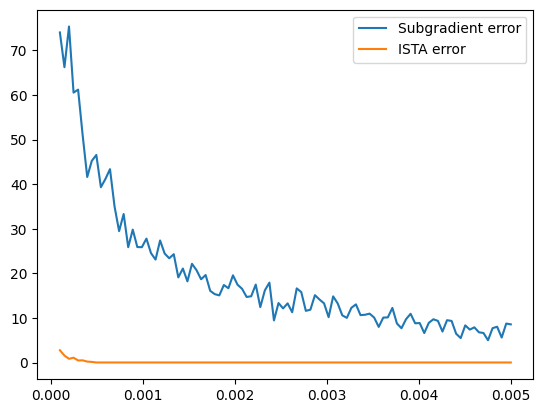

In [ ]:
plt.plot(axes, sub_error)
plt.plot(axes, ista_error)
plt.legend(
    [
        "Subgradient error",
        "ISTA error",
    ]
)
plt.show()

# Boston Housing

In [ ]:
file_name = 'boston_housing.csv'
url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'

if os.path.exists(file_name):
    print(f'Loading data from local file `{file_name}`...')
    df = pd.read_csv(file_name, index_col=0)
else:
    print(f'Loading data from `{url}`...')
    df = pd.read_csv(url)
    df.to_csv(file_name)
    print('Done.')

Loading data from local file `boston_housing.csv`...


In [ ]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
def normalize(x):
    return (x - np.mean(x, axis=0))/np.std(x,axis=0)

In [ ]:
X = normalize(df.iloc[:,df.columns != 'medv'].to_numpy())
y = df.iloc[:,df.columns == 'medv'].to_numpy().reshape(-1)

In [ ]:
lam = 0.0001

sub_optim = regression.SubGradientDescent(learning_rate=0.00001, lam=lam)
ista = regression.ISTA(learning_rate=0.00001, lam=lam)
model_1 = regression.CompressiveLinearModel(np.random.normal(size=[X.shape[1]]))
model_2 = deepcopy(model_1)

metrics_1 = regression.fit(model_1, sub_optim, X, y, num_epochs=100, metrics_dict={"l2": l2})
metrics_2 = regression.fit(model_2, ista, X, y, num_epochs=100, metrics_dict={"l2": l2})

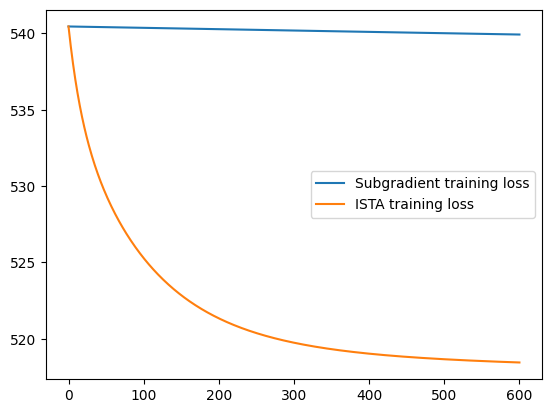

In [ ]:
plt.plot(metrics_1["l2"])
plt.plot(metrics_2["l2"])
# plt.yscale("log")
# plt.xscale("log")
plt.legend(
    [
        "Subgradient training loss",
        "ISTA training loss",
    ]
)
plt.show()

# Sparsity depending on lambda

Todo:
- [X] Sparsity depending on lambda
- [X] Convergence behavior (learning, rate)
- [X] Sensitivity to initialization (random, zeroes, least squares)
- [X] Path
- [X] Boston Housing
- [ ] Boston train / test split
- [ ] compare with scikit